In [93]:
%run init.ipynb
%run entropy.ipynb
%run ptr.ipynb
%run jupyterQ.ipynb

# Simulating non-selective von Neuman measurements

## Quantum channel-based algorithm
Let's consider and observable $O$. If, for a system prepared in the state $\rho$, we measure $O$ non-selectively, or in a non-revealing form, the post-measurement state is
$$\Phi_{O}(\rho)=\sum_{j}|o_{j}\rangle\langle o_{j}|\rho|o_{j}\rangle\langle o_{j}|,$$
which is quivalent to the quantum operations described above if we set the Kraus' operator to $$E_{j}=|o_{j}\rangle\langle o_{j}|.$$ 
It's worth observing that these Kraus' operators must satisfy the restrictions $E_{j}E_{k}=E_{j}\delta_{j,k}\ \forall j,k$ and $\sum_{j=0}^{d_{S}}E_{j}=\mathbb{I}_{S}.$

### One qubit systems
In what follows, let's consider the measurent of a general observable $\hat{n}\cdot\vec{\sigma}$ of a qubit. The eigenvectors are
\begin{align}
& |o_{0}\rangle = |n_{+}\rangle = \cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle, \\
& |o_{1}\rangle = |n_{-}\rangle = \sin(\theta/2)|0\rangle - e^{i\phi}\cos(\theta/2)|1\rangle.
\end{align}
The associated projectors are
\begin{align}
E_{0} &= |o_{0}\rangle\langle o_{0}| = \big(\cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle\big)\big(\cos(\theta/2)\langle 0| + e^{-i\phi}\sin(\theta/2)\langle 1|\big) \\
& = \cos^{2}(\theta/2)|0\rangle\langle 0| + e^{-i\phi}\sin(\theta/2)\cos(\theta/2)|0\rangle\langle 1| + e^{i\phi}\sin(\theta/2)\cos(\theta/2)|1\rangle\langle 0| + \sin^{2}(\theta/2)|1\rangle\langle 1| \\
& \doteq \begin{bmatrix} \cos^{2}(\theta/2) & e^{-i\phi}\sin(\theta/2)\cos(\theta/2) \\ e^{i\phi}\sin(\theta/2)\cos(\theta/2) & \sin^{2}(\theta/2) \end{bmatrix}, \\
E_{1} &= |o_{1}\rangle\langle o_{1}| = \big(\sin(\theta/2)|0\rangle - e^{i\phi}\cos(\theta/2)|1\rangle\big)\big(\sin(\theta/2)\langle 0| - e^{-i\phi}\cos(\theta/2)\langle 1|\big) \\
& = \sin^{2}(\theta/2)|0\rangle\langle 0| - e^{-i\phi}\sin(\theta/2)\cos(\theta/2)|0\rangle\langle 1| - e^{i\phi}\sin(\theta/2)\cos(\theta/2)|1\rangle\langle 0| + \cos^{2}(\theta/2)|1\rangle\langle 1| \\
& \doteq \begin{bmatrix} \sin^{2}(\theta/2) & -e^{-i\phi}\sin(\theta/2)\cos(\theta/2) \\ -e^{i\phi}\sin(\theta/2)\cos(\theta/2) & \cos^{2}(\theta/2) \end{bmatrix}.
\end{align}

In [ ]:
th, ph = symbols('theta phi', real=True) 
E0 = Matrix([[cos(th/2)**2, (cos(ph)-1j*sin(ph))*sin(th/2)*cos(th/2)], 
             [(cos(ph)+1j*sin(ph))*sin(th/2)*cos(th/2),sin(th/2)**2]])
E0

In [ ]:
# coefficients for E0
c0 = trace((id(2)/sqrt(2))*E0); c1 = trace((pauli(1)/sqrt(2))*E0)
c2 = trace((pauli(2)/sqrt(2))*E0); c3 = trace((pauli(3)/sqrt(2))*E0)
simplify(c0), factor(c1), factor(c2), simplify(c3)

So
\begin{align}
E_{0} & = \frac{1}{2}\sigma_{0} + \frac{\sin\theta\cos\phi}{2}\sigma_{1} + \frac{\sin\theta\sin\phi}{2}\sigma_{2} +  \frac{\cos\theta}{2}\sigma_{1} \\
& = W_{0,0}^{A}V_{0,0}^{A}\sigma_{0} + W_{0,1}^{A}V_{1,0}^{A}\sigma_{1} + W_{0,2}^{A}V_{2,0}^{A}\sigma_{2}+ W_{0,3}^{A}V_{3,0}^{A}\sigma_{3}.
\end{align}

In [ ]:
E1 = Matrix([[sin(th/2)**2, -(cos(ph)-1j*sin(ph))*sin(th/2)*cos(th/2)], 
             [-(cos(ph)+1j*sin(ph))*sin(th/2)*cos(th/2),cos(th/2)**2]])
E1

In [ ]:
# coefficients for E1
c0 = trace((id(2)/sqrt(2))*E1); c1 = trace((pauli(1)/sqrt(2))*E1)
c2 = trace((pauli(2)/sqrt(2))*E1); c3 = trace((pauli(3)/sqrt(2))*E1)
simplify(c0), factor(c1), factor(c2), simplify(c3)

So
\begin{align}
E_{1} &= \frac{1}{2}\sigma_{0} - \frac{\sin\theta\cos\phi}{2}\sigma_{1} - \frac{\sin\theta\sin\phi}{2}\sigma_{2} -  \frac{\cos\theta}{2}\sigma_{1} \\
& = W_{1,0}^{A}V_{0,0}^{A}\sigma_{0} + W_{1,1}^{A}V_{1,0}^{A}\sigma_{1} + W_{1,2}^{A}V_{2,0}^{A}\sigma_{2}+ W_{1,3}^{A}V_{3,0}^{A}\sigma_{3}
\end{align}

In [ ]:
# tests for the properties of the Kraus' operators
simplify(E0*E0), simplify(E1*E1), simplify(E0*E1), simplify(E1*E0), simplify(E0+E1) # ok!

Solving the system of nonlinear equations with Sympy
\begin{equation}
\begin{cases}
|V_{0,0}^{A}|^{2}+|V_{1,0}^{A}|^{2}+|V_{2,0}^{A}|^{2}+|V_{3,0}^{A}|^{2}=1, \\
|W_{0,0}^{A}|^{2}+|W_{0,1}^{A}|^{2}+|W_{0,2}^{A}|^{2}+|W_{0,3}^{A}|^{2}=1, \\
|W_{1,0}^{A}|^{2}+|W_{1,1}^{A}|^{2}+|W_{1,2}^{A}|^{2}+|W_{1,3}^{A}|^{2}=1, \\
(W_{1,0}^{A})^{*}W_{0,0}^{A}+(W_{1,1}^{A})^{*}W_{0,1}^{A}+(W_{1,2}^{A})^{*}W_{0,2}^{A}+(W_{1,3}^{A})^{*}W_{0,3}^{A}=0, \\
W_{0,0}^{A}V_{0,0}^{A} =\frac{1}{2}, \ W_{0,1}^{A}V_{1,0}^{A} = \frac{\sin\theta\cos\phi}{2}, \ W_{0,2}^{A}V_{2,0}^{A} = \frac{\sin\theta\sin\phi}{2}, \ W_{0,3}^{A}V_{3,0}^{A} = \frac{\cos\theta}{2}, \\
W_{1,0}^{A}V_{0,0}^{A} = \frac{1}{2}, \ W_{1,1}^{A}V_{1,0}^{A} = -\frac{\sin\theta\cos\phi}{2}, \ W_{1,2}^{A}V_{2,0}^{A} = -\frac{\sin\theta\sin\phi}{2}, \ W_{1,3}^{A}V_{3,0}^{A} = -\frac{\cos\theta}{2}.
\end{cases}
\end{equation}

In [ ]:
#V00 = 1/sqrt(2); W00 = 1/sqrt(2); W10 = 1/sqrt(2) 
#nonlinsolve([V00**2+V10**2+V20**2+V30**2-1, W00**2+W01**2+W02**2+W03**2-1, 
#             W10**2+W11**2+W12**2+W13**2-1, W10*W00+W11*W01+W12*W02+W13*W03,
#             W00*V00-1/2, W01*V10-sin(th)*cos(ph)/2, W02*V20-sin(th)*sin(ph)/2, W03*V30-cos(th)/2, 
#             W10*V00-1/2, W11*V10+sin(th)*cos(ph)/2, W12*V20+sin(th)*sin(ph)/2, W13*V30+cos(th)/2],
#            [V00,V10,V20,V30,W00,W01,W02,W03,W10,W11,W12,W13])

## Controll-NOT-based algorithm qubits
Let's consider two qubits prepared in the state $|\Psi_{0}\rangle=|\psi\rangle\otimes|0\rangle$ and apply a $CNOT=|0\rangle\langle 0|\otimes\sigma_{0}+|1\rangle\langle 1|\otimes\sigma_{1}$:
\begin{align}
|\Psi\rangle &= CNOT|\Psi_{0}\rangle = |0\rangle\langle 0||\psi\rangle\otimes\sigma_{0}|0\rangle + |1\rangle\langle 1||\psi\rangle\otimes\sigma_{1}|0\rangle \\
& = \langle 0|\psi\rangle|0\rangle\otimes|0\rangle + \langle 1|\psi\rangle|1\rangle\otimes|1\rangle.
\end{align}
Tracing out the 2nd system:
\begin{align}
Tr_{p}(\Psi) &= |\langle 0|\psi\rangle|^{2}|0\rangle\langle 0| + |\langle 1|\psi\rangle|^{2}|1\rangle\langle 1| \\
&  = \langle 0|\psi\rangle\langle\psi|0\rangle|0\rangle\langle 0| + \langle 1|\psi\rangle\langle\psi|1\rangle|1\rangle\langle 1|  = |0\rangle\langle 0|\psi\rangle\langle\psi|0\rangle\langle 0| + |1\rangle\langle 1|\psi\rangle\langle\psi|1\rangle\langle 1| \\
&= P_{0}|\psi\rangle\langle\psi|P_{0} + P_{1}|\psi\rangle\langle\psi|P_{1} =: \Pi_{0,1}(\psi).
\end{align}
So, the control-NOT can be used to perform a non-selective measurement in the computational basis.

Following, let's consider a general basis
\begin{align}
|n_{0}\rangle = \cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle = U|0\rangle, \\
|n_{1}\rangle = -\sin(\theta/2)|0\rangle + e^{i\phi}\cos(\theta/2)|1\rangle = U|1\rangle,
\end{align}
with
\begin{equation}
U_{c\rightarrow g} = \begin{bmatrix} \cos(\theta/2) & -\sin(\theta/2) \\ e^{i\phi}\sin(\theta/2) & e^{i\phi}\cos(\theta/2) \end{bmatrix} \ \therefore\  U_{c\rightarrow g}^{\dagger} = \begin{bmatrix} \cos(\theta/2) & e^{-i\phi}\sin(\theta/2) \\ -\sin(\theta/2) & e^{-i\phi}\cos(\theta/2) \end{bmatrix}.
\end{equation}

Non-selective measure of the general observable $\hat{n}\cdot\vec{\sigma}$:
\begin{align}
\Pi_{n_{0},n_{1}}(\psi) &= P_{n_{0}}|\psi\rangle\langle\psi|P_{n_{0}}  + P_{n_{1}}|\psi\rangle\langle\psi|P_{n_{1}} \\ 
&= |n_{0}\rangle\langle n_{0}||\psi\rangle\langle\psi||n_{0}\rangle\langle n_{0}|  + |n_{1}\rangle\langle n_{1}||\psi\rangle\langle\psi||n_{1}\rangle\langle n_{1}| \\
&= U|0\rangle\langle 0|U^{\dagger}|\psi\rangle\langle\psi|U|0\rangle\langle 0|U^{\dagger}  + U|1\rangle\langle 1|U^{\dagger}|\psi\rangle\langle\psi|U|1\rangle\langle 1|U^{\dagger} \\
&= U\big(|0\rangle\langle 0||\psi'\rangle\langle\psi'||0\rangle\langle 0|  + |1\rangle\langle 1||\psi'\rangle\langle\psi'||1\rangle\langle 1|\big)U^{\dagger} \\
&= U\Pi_{0,1}(\psi')U^{\dagger},
\end{align}
where we defined $$|\psi'\rangle:=U^{\dagger}|\psi\rangle.$$ So, a non-selective measurement of an arbitrary one-qubit observable may be implemented using the quantum circuit below
<img src='fig_measure_sim.png' width='400'>

IBMQE gates: $U(\theta,\phi,\lambda)=\begin{bmatrix}\cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\ e^{i\phi}\sin(\theta/2) & e^{i(\phi+\lambda)}\cos(\theta/2) \end{bmatrix}$. We shall also need $U^{\dagger}(\theta,\phi,\lambda)=\begin{bmatrix}\cos(\theta/2) & e^{-i\phi}\sin(\theta/2) \\ -e^{-i\lambda}\sin(\theta/2) & e^{-i(\phi+\lambda)}\cos(\theta/2) \end{bmatrix} = U(\theta,\pi-\lambda,-\pi-\phi)$

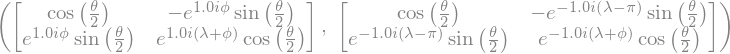

In [3]:
def U(th,ph,lb):
    return Matrix([[cos(th/2),-exp(1j*ph)*sin(th/2)],
                   [exp(1j*ph)*sin(th/2),exp(1j*(ph+lb))*cos(th/2)]])
th,ph,lb = symbols('theta phi lambda', real=True)
U(th,ph,lb), simplify(U(th,pi-lb,-pi-ph)) # ok!

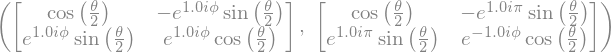

In [4]:
U(th,ph,0), U(th,pi-0,-pi-ph) # ok!

# Implementation on IBMQ
## Representation of a qubit state $\rho$ in a basis $\{|n_{0}\rangle,|n_{1}\rangle\}$

In [43]:
def n_basis(th, ph, typ): # general one-qubit basis
    if typ == 's': # for symbols
        ket_n0 = Matrix([[cos(th/2)],[(cos(ph)+1j*sin(ph))*sin(th/2)]])
        bra_n0 = Matrix([[cos(th/2),(cos(ph)-1j*sin(ph))*sin(th/2)]])
        ket_n1 = Matrix([[-sin(th/2)],[(cos(ph)+1j*sin(ph))*cos(th/2)]])
        bra_n1 = Matrix([[-sin(th/2),(cos(ph)-1j*sin(ph))*cos(th/2)]])
    elif typ == 'n': # for numbers
        ket_n0 = np.array([[math.cos(th/2)],[(math.cos(ph)+1j*math.sin(ph))*math.sin(th/2)]])
        bra_n0 = np.array([[math.cos(th/2),(math.cos(ph)-1j*math.sin(ph))*math.sin(th/2)]])
        ket_n1 = np.array([[-math.sin(th/2)],[(math.cos(ph)+1j*math.sin(ph))*math.cos(th/2)]])
        bra_n1 = np.array([[-math.sin(th/2),(math.cos(ph)-1j*math.sin(ph))*math.cos(th/2)]])
    return ket_n0, bra_n0, ket_n1, bra_n1

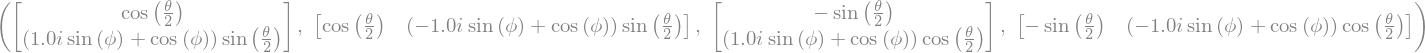

In [44]:
typ = 's' # choose to use symbols (s) or numbers (any other symbol)
if typ == 's':
    th, ph = symbols('theta phi'); ket_n0, bra_n0, ket_n1, bra_n1 = n_basis(th, ph, typ)
elif typ == 'n':
    th = math.pi/4; ph = 0; ket_n0, bra_n0, ket_n1, bra_n1 = n_basis(th, ph, typ)
ket_n0, bra_n0, ket_n1, bra_n1

In [45]:
def rho_basis_n(th, ph, rho, typ): # representation of rho in a given basis
    ket_n0, bra_n0, ket_n1, bra_n1 = n_basis(th, ph, typ)
    if typ == 's':
        rhon = Matrix([[bra_n0*rho*ket_n0, bra_n0*rho*ket_n1],[bra_n1*rho*ket_n0, bra_n1*rho*ket_n1]])
    elif typ == 'n':
        rho00 = bra_n0.dot(rho.dot(ket_n0)); rho01 = bra_n0.dot(rho.dot(ket_n1))
        rho10 = bra_n1.dot(rho.dot(ket_n0)); rho11 = bra_n1.dot(rho.dot(ket_n1))
        rhon = np.array([[rho00.item(), rho01.item()],[rho10.item(), rho11.item()]])
    return rhon

In [46]:
typ = 'n'
if typ == 's':
    th, ph = symbols('theta phi'); rho00,rho01,rho10,rho11 = symbols('r_{00} r_{01} r_{10} r_{11}') 
    rho = Matrix([[rho00,rho01],[rho10,rho11]]); rhon = rho_basis_n(th, ph, rho, typ)
elif typ == 'n':
    th = -math.pi/2; ph = 0; rho00,rho01,rho10,rho11 = 1,0,0,0
    rho = np.array([[rho00,rho01],[rho10,rho11]]); rhon = rho_basis_n(th, ph, rho, typ)
rhon

array([[0.5+0.j, 0.5+0.j],
       [0.5+0.j, 0.5+0.j]])

## Functions
von Neumann predictability in relation to the observable $X$: 
$$P_{vn}^{X}(\rho) = \log_{2}(d)-S_{vn}(\Phi_{X}(\rho)).$$ 
We have the equality 
$$P_{vn}^{X}(\rho) = C_{re}^{Y}(\Phi_{X}(\rho)),$$ 
where
$$C_{re}^{Y}(\Phi_{X}(\rho)) = S_{vn}(\Phi_{X}(\rho)_{diag})-S_{vn}(\Phi_{X}(\rho)).$$

In [47]:
%run entropy.ipynb

### Predictability

In [48]:
def predictability_vn(rho, th, ph): # th,ph define the reference basis
    d = rho.shape[0]; 
    # matrix rep. of rho in the basis def. by (th,ph)
    rhon = rho_basis_n(th, ph, rho, 'n');# print('rhon = ',rhon)
    pv = np.zeros(d); 
    for j in range(0,d):
        pv[j] = rhon[j,j].real
    return log(d, 2) - shannon_num(pv)

In [49]:
rho = np.array([[1/2,0],[0,1/2]]); predictability_vn(rho, 0, 0)

### Coherence

In [50]:
def coherence_re(rho, th, ph): # th,ph defines the reference basis
    d = rho.shape[0]; pv = np.zeros(d)
    # matrix representation of rho in the basis defined by (th,ph)
    rhon = rho_basis_n(th, ph, rho, 'n'); #print(rhon)
    for j in range(0, d):
        pv[j] = rhon[j,j].real
    # we use the same state to compute S_vn because of its basis invariance
    return shannon_num(pv) - von_neumann_num(rho)

In [51]:
rho = np.array([[0.99999999999999999,0],[0,1-0.99999999999999999]]); coherence_re(rho, 0, 0)

### Purity

In [52]:
def purity(rho):
    return np.trace(rho.dot(rho))

In [53]:
rho = np.array([[0.99999,0],[0,0.00001]]); print('rho = ',rho); # ok for some examples
print('P = ', purity(rho))
th = -0*math.pi/2; ph = 0
print('P_vn = ', float(predictability_vn(rho, th, ph)))
th = -1*math.pi/2; ph = 0
print('C_re = ', float(coherence_re(rho, th, ph)))

rho =  [[9.9999e-01 0.0000e+00]
 [0.0000e+00 1.0000e-05]]
P =  0.9999800002000001
P_vn =  0.9998194767169818
C_re =  0.9998194767169818


## Implementation

In [32]:
from qiskit import *
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter

In [33]:
nshots = 8192
qr = QuantumRegister(2); 
qc = qiskit.QuantumCircuit(qr); 

In [34]:
# Verification that the circuit is right
import math
# State preparation
th1, ph1, lb1 = math.pi, math.pi, 0; 
qc.u(th1, ph1, lb1, qr[0]); #print('prep = ',th1, ph1, lb1)
qc.draw()

┌──────────┐
q0_0: ┤ U(π,π,0) ├
      └──────────┘
q0_1: ────────────

In [61]:
qc.barrier()
# Non-revealing measurement
th2 = math.pi; ph2 = math.pi/2; lb2 = 0
th3 = th2; ph3 = math.pi-lb2; lb3 = -math.pi-ph2; qc.u(th3, ph3, lb3, qr[0]); # Uˆdagger
qc.cx(qr[0], qr[1]); #print('meas = ',th2, ph2, lb2)
qc.u(th2, ph2, lb2, qr[0]);
# qstate tomography for Pi(rho)
qst_qc = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
job = qiskit.execute(qst_qc, Aer.get_backend('qasm_simulator'), shots=shots) # executes the qst
qstf_qc = StateTomographyFitter(job.result(), qst_qc) # fits the data to extract rho
rho10_meas = qstf_qc.fit(method='lstsq'); 
rho0_meas = pTraceL_num(2, 2, rho10_meas); #print('Pi(rho) = ', rho0_meas)
qc.draw()

┌──────────┐┌──────────────┐     ┌────────────┐
q4_0: ┤ U(π,π,0) ├┤ U(π,π,-3π/2) ├──■──┤ U(π,π/2,0) ├
      └──────────┘└──────────────┘┌─┴─┐└────────────┘
q4_1: ────────────────────────────┤ X ├──────────────
                                  └───┘

### IBMQ-related stuff

In [74]:
from qiskit import IBMQ

In [75]:
#IBMQ.save_account('', overwrite = True)

In [76]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-07-08 18:35:54,265: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [79]:
provider = IBMQ.get_provider(hub = 'ibm-q-research-2', group = 'federal-uni-sant-1', project = 'main')
#provider.backends()

In [80]:
device = provider.get_backend('ibmq_belem')
simulator = Aer.get_backend('qasm_simulator')
from qiskit.tools.monitor import job_monitor
nshots = 8192

### 1st app:

$$|\psi\rangle = \cos(\theta/2)|0\rangle+\sin(\theta/2)|1\rangle \text{ for } \theta\in[0,\pi/2]$$

In [81]:
import platform
if platform.system() == 'Linux':
    path = '/home/jonasmaziero/Dropbox/Research/predictability/data_psi/round1/'
else:
    path = '/Users/jonasmaziero/Dropbox/Research/predictability/data_psi/round1/'
print(path) # ok!

/Users/jonasmaziero/Dropbox/Research/predictability/data_psi/round1/


In [82]:
# Measurement error mitigation of the chosen device
qr = QuantumRegister(2)
qc_cal = qiskit.QuantumCircuit(qr)
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)
cal_circuits, state_labels = complete_meas_cal(qr = qc.qregs[0], circlabel = 'mmc')
cal_job = execute(cal_circuits, backend = device, shots = nshots, optimization_level = 0)
print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.result()
meas_fitter = CompleteMeasFitter(cal_results, state_labels)
meas_filter = meas_fitter.filter
# using
#mitigated_result = meas_filter.apply(job.result());

60e76fd1b58808dc276cbd54
Job Status: job has successfully run


In [72]:
%run ptr.ipynb

In [73]:
th_min = 0; th_max = math.pi/2; N = 10; dth = (th_max-th_min)/N; th = -dth + 10**-1; thv = np.zeros(N+1)
for j in range(0, N+1):
    qr = QuantumRegister(2)
    qc = qiskit.QuantumCircuit(qr)
    th += dth
    thv[j] = th 
    
    # State preparation
    th1 = th; ph1 = 0; lb1 = 0 # angles for the state preparation
    qc.u(th1, ph1, lb1, qr[0]); #print('prep = ',th1, ph1, lb1)
    # qstate tomography for rho
    qst_qc1 = state_tomography_circuits(qc, [qr[0],qr[1]]); # defines the qcircuit to make qst
    # simulator
    job_sim1 = qiskit.execute(qst_qc1, backend = simulator, shots = nshots); # executes the qst
    qstf_qc_sim1 = StateTomographyFitter(job_sim1.result(), qst_qc1); # fits the data to extract rho
    rho10_prep_sim = qstf_qc_sim1.fit(method = 'lstsq');
    rho0_prep_sim = pTraceL_num(2, 2, rho10_prep_sim)
    file = open(path+str(j)+'prep'+'sim', "wb"); np.save(file, rho0_prep_sim); file.close;
    # device
    job_dev1 = qiskit.execute(qst_qc1, backend = device, shots = nshots); # executes the qst
    print(job_dev1.job_id());
    job_monitor(job_dev1);
    job_dev_mit1 = meas_filter.apply(job_dev1.result(), method='least_squares'); # error mitigation
    qstf_qc_dev1 = StateTomographyFitter(job_dev_mit1, qst_qc1); # fits the data to extract rho
    rho10_prepE = qstf_qc_dev1.fit(method = 'lstsq');
    rho0_prepE = pTraceL_num(2, 2, rho10_prepE)
    file = open(path+str(j)+'prep'+'dev', "wb"); np.save(file, rho0_prepE); file.close;
    '''
    # Non-revealing measurement
    th3 = th2; ph3 = math.pi-lb2; lb3 = -math.pi-ph2; # angles for Uˆdagger
    qc.u(th3, ph3, lb3, qr[0]); # Uˆdagger
    qc.cx(qr[0], qr[1]) # CNOT
    qc.u(th2, ph2, lb2, qr[0]); # Final U
    # qstate tomography for Pi(rho)
    qst_qc2 = state_tomography_circuits(qc, [qr[0]]); # defines the qcircuit to make qst
    # simulator
    job_sim2 = qiskit.execute(qst_qc2, backend = simulator, shots = nshots); # executes the qst
    qstf_qc_sim2 = StateTomographyFitter(job_sim2.result(), qst_qc2); # fits the data to extract rho
    rho0_meas = qstf_qc_sim2.fit(method='lstsq');
    file = open(path+str(j)+'meas'+'sim', "wb"); np.save(file, rho0_meas); file.close;
    # device
    job_dev2 = qiskit.execute(qst_qc2, backend = device, shots = nshots); # executes the qst
    print(job_dev2.job_id());
    job_monitor(job_dev2);
    job_dev_mit2 = meas_filter.apply(job_dev2.result(), method='least_squares'); # error mitigation
    qstf_qc_dev2 = StateTomographyFitter(job_dev_mit2.result(), qst_qc2); # fits the data to extract rho
    rho0_measE = qstf_qc_dev2.fit(method='lstsq');
    file = open(path+str(j)+'meas'+'dev', "wb"); np.save(file, rho0_measE); file.close;
    '''

IBMQBackendApiError: 'Error submitting job: "HTTPSConnectionPool(host=\'api-qcon.quantum-computing.ibm.com\', port=443): Read timed out. (read timeout=None)"'

In [44]:
Pv = np.zeros(N+1); Cv = np.zeros(N+1); Sv = np.zeros(N+1)
PvE = np.zeros(N+1); CvE = np.zeros(N+1); SvE = np.zeros(N+1)
for j in range(0, N+1):
    file = open(path+str(j)+'prep'+'sim', "rb"); rho0_prep = np.load(file)
    th2, ph2, lb2 = 0, 0, 0 # P in relation to sigma_z, & we measure in this basis
    Pv[j] = predictability_vn(rho0_prep, th2, ph2)
    Sv[j] = linear_entropy(rho0_prep)
    file = open(path+str(j)+'prep'+'dev', "rb"); rho0_prepE = np.load(file)
    th2, ph2, lb2 = 0, 0, 0 # P in relation to sigma_z, & we measure in this basis
    PvE[j] = predictability_vn(rho0_prepE, th2, ph2)
    SvE[j] = linear_entropy(rho0_prepE)
    file = open(path+str(j)+'meas'+'sim', "rb"); rho0_meas = np.load(file)
    Cv[j] = coherence_re(rho0_meas, -math.pi/2, 0) # C with reference to sigma_x
    file = open(path+str(j)+'meas'+'dev', "rb"); rho0_measE = np.load(file)
    CvE[j] = coherence_re(rho0_measE, -math.pi/2, 0) # C with reference to sigma_x
    print('th = ', thv[j], ', P = ', Pv[j], ', C = ', Cv[j], ', S = ', Sv[j],
          ', PE = ', PvE[j], ', CE = ', CvE[j], ', SE = ', SvE[j])

th =  0.1 , P =  0.9752953993927822 , C =  0.9784408880152994 , S =  3.072619438193591e-05 , PE =  0.9021718949493143 , CE =  0.8913686845033462 , SE =  -2.220446049250313e-16
th =  0.25707963267948963 , P =  0.8829837997294774 , C =  0.8746663758118112 , S =  2.220446049250313e-16 , PE =  0.830440814555092 , CE =  0.8116626764474815 , SE =  0.0
th =  0.4141592653589793 , P =  0.7497376383505936 , C =  0.7559840866692327 , S =  -2.220446049250313e-16 , PE =  0.7057631035509262 , CE =  0.702765150865797 , SE =  0.0
th =  0.571238898038469 , P =  0.5894290353630852 , C =  0.6071995751862327 , S =  0.012796342372893843 , PE =  0.5610797256138276 , CE =  0.5820181910233337 , SE =  0.0
th =  0.7283185307179586 , P =  0.45030809694740204 , C =  0.45177003636587254 , S =  0.0 , PE =  0.4520417867526365 , CE =  0.44793352261692715 , SE =  2.220446049250313e-16
th =  0.8853981633974483 , P =  0.3043044961271205 , C =  0.31749544057555007 , S =  0.006593048572540061 , PE =  0.30356417780619327 ,

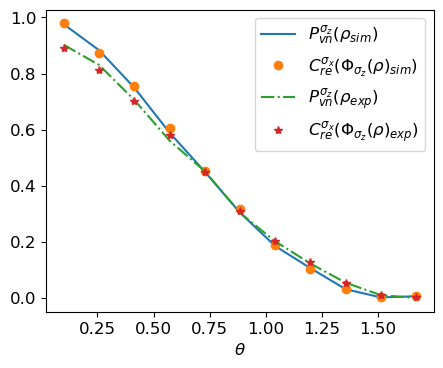

In [48]:
import matplotlib
matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (5,4), dpi = 100)
plt.plot(thv, Pv, label = r'$P_{vn}^{\sigma_{z}}(\rho_{sim})$')
plt.plot(thv, Cv, 'o', label = r'$C_{re}^{\sigma_{x}}(\Phi_{\sigma_{z}}(\rho)_{sim})$') 
#plt.plot(thv, Sv, label = r'$S_{L}(\rho_{sim})$')
plt.plot(thv, PvE, '-.', label = r'$P_{vn}^{\sigma_{z}}(\rho_{exp})$')
plt.plot(thv, CvE, '*', label = r'$C_{re}^{\sigma_{x}}(\Phi_{\sigma_{z}}(\rho)_{exp})$') 
#plt.plot(thv, SvE, 'D', label = r'$S_{L}(\rho_{exp})$')
plt.xlabel(r'$\theta$'); 
#plt.legend(loc = 'center right', bbox_to_anchor=(th_max-0.05, 0.5))
plt.legend(loc = 'upper right')
plt.savefig(path+'psi_plot1.png', format = 'png', dpi = 200)
plt.show()

### 2nd app: 
$$|\psi\rangle = \cos(\theta/2)|00\rangle+\sin(\theta/2)|11\rangle$ for $\theta\in[0,\pi/2]$$

Nesse caso, o estado reduzido é $$\rho =  \cos^{2}(\theta/2)|0\rangle\langle 0| + \sin^{2}(\theta/2)|1\rangle\langle 1|$$

In [78]:
import platform
if platform.system() == 'Linux':
    path = '/home/jonasmaziero/Dropbox/Research/predictability/data_rho/round1/'
else:
    path = '/Users/jonasmaziero/Dropbox/Research/predictability/data_rho/round1/'
print(path) # ok!

In [79]:
shots = 8192
th_min = 0; th_max = math.pi/2; N = 10; dth = (th_max-th_min)/N; th = -dth + 10**-1; thv = np.zeros(N+1)
for j in range(0, N+1):
    qr = QuantumRegister(3); qc = qiskit.QuantumCircuit(qr)
    th += dth; thv[j] = th; #print(thv[j]); 
    
    # State preparation
    th1 = th; ph1 = 0; lb1 = 0 # angles for the two-qubit state preparation
    qc.u(th1, ph1, lb1, qr[0])
    qc.cx(qr[0], qr[1])
    # qstate tomography for rho
    qst_qc = state_tomography_circuits(qc, [qr[1]]) # defines the qcircuit to make qst
    # simulator
    job = qiskit.execute(qst_qc, backend = simulator, shots = nshots) # executes the qst
    qstf_qc = StateTomographyFitter(job.result(), qst_qc) # fits the data to extract rho
    rho0_prep = qstf_qc.fit(method = 'lstsq')
    file = open(path+str(j)+'prep'+'sim', "wb"); np.save(file, rho0_prep); file.close
    # device
    job = qiskit.execute(qst_qc, backend = device, shots = nshots) # executes the qst
    qstf_qc = StateTomographyFitter(job.result(), qst_qc) # fits the data to extract rho
    rho0_prepE = qstf_qc.fit(method = 'lstsq')
    file = open(path+str(j)+'prep'+'dev', "wb"); np.save(file, rho0_prepE); file.close
    
    # Non-revealing measurement
    th3 = th2; ph3 = math.pi-lb2; lb3 = -math.pi-ph2; # angles for U^dagger
    qc.u(th3, ph3, lb3, qr[1]); # Uˆdagger
    qc.cx(qr[1], qr[2]); # CNOT
    qc.u(th2, ph2, lb2, qr[1]); # the last U
    # qstate tomography for Pi(rho)
    qst_qc = state_tomography_circuits(qc, [qr[1]]) # defines the qcircuit to make qst
    # simulator
    job = qiskit.execute(qst_qc, backend = simulator, shots = nshots) # executes the qst
    qstf_qc = StateTomographyFitter(job.result(), qst_qc) # fits the data to extract rho
    rho0_meas = qstf_qc.fit(method='lstsq') 
    file = open(path+str(j)+'meas'+'sim', "wb"); np.save(file, rho0_meas); file.close
    # device
    job = qiskit.execute(qst_qc, backend = device, shots = nshots) # executes the qst
    qstf_qc = StateTomographyFitter(job.result(), qst_qc) # fits the data to extract rho
    rho0_measE = qstf_qc.fit(method='lstsq') 
    file = open(path+str(j)+'meas'+'dev', "wb"); np.save(file, rho0_measE); file.close

In [80]:
job_monitor(job)

Job Status: job has successfully run


In [82]:
Pv = np.zeros(N+1); Cv = np.zeros(N+1); Sv = np.zeros(N+1)
PvE = np.zeros(N+1); CvE = np.zeros(N+1); SvE = np.zeros(N+1)
for j in range(0, N+1):
    file = open(path+str(j)+'prep'+'sim', "rb"); rho0_prep = np.load(file)
    th2, ph2, lb2 = 0, 0, 0 # P in relation to sigma_z, & we measure in this basis
    Pv[j] = predictability_vn(rho0_prep, th2, ph2)
    Sv[j] = linear_entropy(rho0_prep)
    file = open(path+str(j)+'prep'+'dev', "rb"); rho0_prepE = np.load(file)
    th2, ph2, lb2 = 0, 0, 0 # P in relation to sigma_z, & we measure in this basis
    PvE[j] = predictability_vn(rho0_prepE, th2, ph2)
    SvE[j] = linear_entropy(rho0_prepE)
    file = open(path+str(j)+'meas'+'sim', "rb"); rho0_meas = np.load(file)
    Cv[j] = coherence_re(rho0_meas, -math.pi/2, 0) # C with reference to sigma_x
    file = open(path+str(j)+'meas'+'dev', "rb"); rho0_measE = np.load(file)
    CvE[j] = coherence_re(rho0_measE, -math.pi/2, 0) # C with reference to sigma_x
    print('th = ', thv[j], ', P = ', Pv[j], ', C = ', Cv[j], ', S = ', Sv[j],
          ', PE = ', PvE[j], ', CE = ', CvE[j], ', SE = ', SvE[j])

th =  0.1 , P =  0.9763587926611335 , C =  0.9651140581686878 , S =  0.004533112049102561 , PE =  0.7514076254138233 , CE =  0.5797833959219881 , SE =  0.07449975609779402
th =  0.25707963267948963 , P =  0.8868148164620783 , C =  0.8797941344841596 , S =  0.02977296710014321 , PE =  0.6885192690938824 , CE =  0.5425106052880965 , SE =  0.10252657532691867
th =  0.4141592653589793 , P =  0.7642835945489004 , C =  0.7444061788481758 , S =  0.0740714073181159 , PE =  0.5839349086365273 , CE =  0.4817028472280118 , SE =  0.14860293269157387
th =  0.571238898038469 , P =  0.5945431698787081 , C =  0.6076804323124576 , S =  0.148688465356827 , PE =  0.4745253775289242 , CE =  0.3902125162517966 , SE =  0.20472806692123435
th =  0.7283185307179586 , P =  0.4475914534573774 , C =  0.45613573929711426 , S =  0.22341474890708946 , PE =  0.37741714060514486 , CE =  0.3036224359677458 , SE =  0.2567662298679352
th =  0.8853981633974483 , P =  0.3102879477694489 , C =  0.306713594724637 , S =  0.3

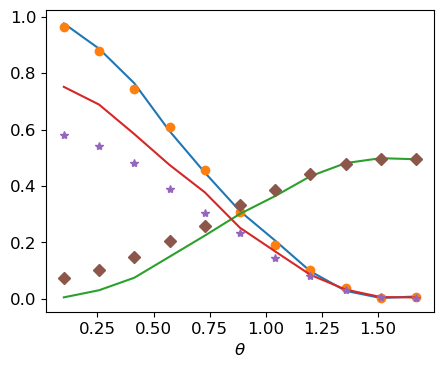

In [88]:
matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (5,4), dpi = 100)
plt.plot(thv, Pv, label = r'$P_{vn}^{\sigma_{z}}(\rho_{sim})$')
plt.plot(thv, Cv, 'o', label = r'$C_{re}^{\sigma_{x}}(\Phi_{\sigma_{z}}(\rho)_{sim})$') 
plt.plot(thv, Sv, label = r'$S_{L}(\rho_{sim})$')
plt.plot(thv, PvE, label = r'$P_{vn}^{\sigma_{z}}(\rho_{exp})$')
plt.plot(thv, CvE, '*', label = r'$C_{re}^{\sigma_{x}}(\Phi_{\sigma_{z}}(\rho)_{exp})$') 
plt.plot(thv, SvE, 'D', label = r'$S_{L}(\rho_{exp})$')
plt.xlabel(r'$\theta$'); 
#plt.legend(loc = 'center right', bbox_to_anchor=(th_max-0.05, 0.5))
#plt.legend(loc = 'upper right')
plt.savefig(path+'rho1.eps', format = 'eps', dpi = 200)
plt.show()

# 1 qubit (random observables)
Here we experimentally test the inequality $$C^{Y}_{re}(\Phi_{X}(\rho)) \le P^{X}_{vn}(\rho).$$
We choose $X$, $Y$, and $\rho=|\psi\rangle\langle\psi|$ randomly.

In [146]:
import platform
if platform.system() == 'Linux':
    path_ = '/home/jonasmaziero/Dropbox/Research/predictability/rand_1qb/'
else:
    path_ = '/Users/jonasmaziero/Dropbox/Research/predictability/rand_1qb/'

In [147]:
for rd in range(2, 11): # creatind the directories to store the data for each round of experiments
    dirname = path_ + 'round' + str(rd); #print(dirname)
    os.mkdir(dirname);

FileExistsError: [Errno 17] File exists: '/Users/jonasmaziero/Dropbox/Research/predictability/rand_1qb/round2'

In [217]:
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q-research-2', group = 'federal-uni-sant-1', project = 'main')
from qiskit.tools.monitor import job_monitor
nshots = 8192
from qiskit import *
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter

ibmqfactory.load_account:WARNING:2021-07-19 20:05:50,735: Credentials are already in use. The existing account in the session will be replaced.


## The angles

In [179]:
N = 150 # number of samples
thvS = np.zeros(N); phvS = np.zeros(N); thvX = np.zeros(N); phvX = np.zeros(N)
thvY = np.zeros(N); phvY = np.zeros(N); jv = np.zeros(N)
for j in range(0, N):
    jv[j] = j; #print('j = ', j)
    thvS[j] = math.acos(-1 + 2*random.random())
    phvS[j] = 2*math.pi*random.random()
    thvX[j] = math.acos(-1 + 2*random.random())
    phvX[j] = 2*math.pi*random.random()
    thvY[j] = math.acos(-1 + 2*random.random())
    phvY[j] = 2*math.pi*random.random()
file = open(path_+'thvS', "wb"); np.save(file, thvS); file.close()
file = open(path_+'phvS', "wb"); np.save(file, phvS); file.close()
file = open(path_+'thvX', "wb"); np.save(file, thvX); file.close()
file = open(path_+'phvX', "wb"); np.save(file, phvX); file.close()
file = open(path_+'thvY', "wb"); np.save(file, thvY); file.close()
file = open(path_+'phvY', "wb"); np.save(file, phvY); file.close()

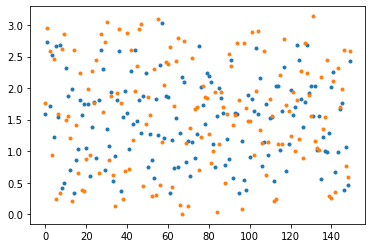

In [150]:
plt.plot(jv, thvS, '.'); plt.plot(jv, phvS/2, '.'); plt.show()

In [115]:
#plt.plot(jv, thvX, '.'); plt.plot(jv, phvY/2, '.'); plt.show()

In [114]:
#plt.plot(jv, thvY, '.'); plt.plot(jv, phvY/2, '.'); plt.show()

## Theoretical

In [32]:
def U_gate(th, ph, lb):
    return np.array([[math.cos(th/2), -math.sin(th/2)*(math.cos(lb)+1j*math.sin(lb))],
                     [math.sin(th/2)*(math.cos(ph)+1j*math.sin(ph)), 
                      math.cos(th/2)*(cos(ph+lb)+1j*math.sin(ph+lb))]])
#U_gate(thv[0], phv[0], 0) # seems ok

In [175]:
def CNOT_AB():
    return tp(proj(cb(2,0)), id(2)) + tp(proj(cb(2,1)), pauli(1))
#CNOT_AB() # ok

In [180]:
PvT = np.zeros(N); CvT = np.zeros(N); Psi0 = tp(cb(2,0), cb(2,0))
for j in range(0, N):
    Psi1 = np.dot(tp(U_gate(thvS[j], phvS[j], 0), id(2)), Psi0) # state preparation
    rhoL = pTraceR_num(2, 2, proj(Psi1)); 
    PvT[j] = predictability_vn(rhoL, thvX[j], phvX[j])
    Psi2 = np.dot(tp(U_gate(thvX[j], math.pi-0, -math.pi-phvX[j]), id(2)), Psi1)
    Psi3 = np.dot(CNOT_AB(), Psi2)
    Psi4 = np.dot(tp(U_gate(thvX[j], phvX[j], 0), id(2)), Psi3)
    rhoL = pTraceR_num(2, 2, proj(Psi4)); 
    CvT[j] = coherence_re(rhoL, thvY[j], phvY[j])

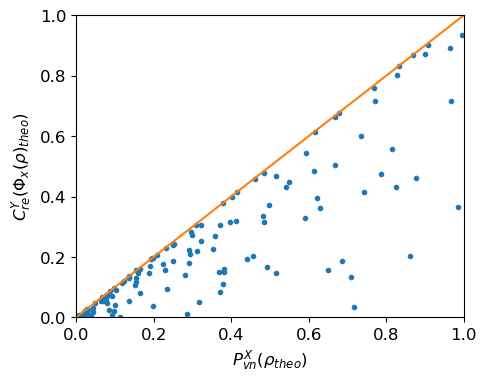

In [245]:
import matplotlib; matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (5,4), dpi = 100)
plt.plot(PvT, CvT, '.'); plt.xlim(0,1); plt.ylim(0,1); 
plt.plot([0,1],[0,1]); plt.ylabel(r'$C^{Y}_{re}(\Phi_{x}(\rho)_{theo})$'); 
plt.xlabel(r'$P^{X}_{vn}(\rho_{theo})$')
plt.savefig(path_+'PxCtheo.pdf', format = 'pdf', dpi = 200); plt.show()

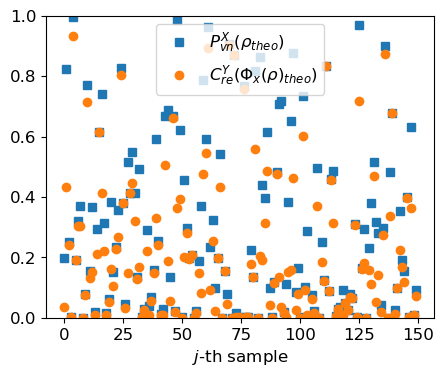

In [246]:
import matplotlib; matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (5,4), dpi = 100)
plt.plot(jv, PvT, 's', label = r'$P^{X}_{vn}(\rho_{theo})$'); 
plt.plot(jv, CvT, 'o', label = r'$C^{Y}_{re}(\Phi_{x}(\rho)_{theo})$'); plt.ylim(0, 1)
plt.xlabel(r'$j$-th sample'); plt.legend(loc = 'upper center')
plt.savefig(path_+'PCtheo.pdf', format = 'pdf', dpi = 200); plt.show()

## Simulation

In [183]:
# loading the angles from files
file = open(path_+'thvS', "rb"); thvS = np.load(file); file.close()
file = open(path_+'phvS', "rb"); phvS = np.load(file); file.close()
file = open(path_+'thvX', "rb"); thvX = np.load(file); file.close()
file = open(path_+'phvX', "rb"); phvX = np.load(file); file.close()
file = open(path_+'thvY', "rb"); thvY = np.load(file); file.close()
file = open(path_+'phvY', "rb"); phvY = np.load(file); file.close()
#print(thvS)

In [184]:
simulator = Aer.get_backend('qasm_simulator')
lb = 0
NR = 10
for rd in range(1, NR+1):
    path = path_ + 'round' + str(rd) + '/'
    for j in range(0, N):
        qr = QuantumRegister(2); qc = qiskit.QuantumCircuit(qr)
        # State preparation
        qc.u(thvS[j], phvS[j], lb, qr[0])
        qst_qc1 = state_tomography_circuits(qc, [qr[0]]); # defines the qcircuit to make qst
        job = qiskit.execute(qst_qc1, backend = simulator, shots = nshots) # executes the qst
        qstf_qc1 = StateTomographyFitter(job.result(), qst_qc1) # fits the data to extract rho
        rho0_prep = qstf_qc1.fit(method = 'lstsq'); #print(predictability_vn(rho0_prep, 0, 0)) # ok
        file = open(path+str(j)+'prep'+'sim', "wb"); np.save(file, rho0_prep); file.close
        # Non-revealing measurement
        qc.u(thvX[j], math.pi-lb, -math.pi-phvX[j], qr[0]); # Uˆdagger
        qc.cx(qr[0], qr[1]); # CNOT
        qc.u(thvX[j], phvX[j], lb, qr[0]); # the last U
        qst_qc2 = state_tomography_circuits(qc, [qr[0]]) # defines the qcircuit to make qst
        job2 = qiskit.execute(qst_qc2, backend = simulator, shots = nshots) # executes the qst
        qstf_qc2 = StateTomographyFitter(job2.result(), qst_qc2) # fits the data to extract rho
        rho0_meas = qstf_qc2.fit(method='lstsq') 
        file = open(path+str(j)+'meas'+'sim', "wb"); np.save(file, rho0_meas); file.close()

In [185]:
for rd in range(1, NR+1):
    path = path_ + 'round' + str(rd) + '/'
    PvS = np.zeros(N); CvS = np.zeros(N)
    for j in range(0, N):
        file = open(path+str(j)+'prep'+'sim', "rb"); rho0_prep = np.load(file); file.close()
        PvS[j] = predictability_vn(rho0_prep, thvX[j], phvX[j]) # P with reference to X
        file = open(path+str(j)+'meas'+'sim', "rb"); rho0_meas = np.load(file); file.close()
        CvS[j] = coherence_re(rho0_meas, thvY[j], phvY[j]) # C with reference to Y
    file = open(path+'PvS', "wb"); np.save(file, PvS); file.close()
    file = open(path+'CvS', "wb"); np.save(file, CvS); file.close()

In [186]:
PvaS = np.zeros(N); CvaS = np.zeros(N)
Pv2aS = np.zeros(N); Cv2aS = np.zeros(N); sdPS = np.zeros(N); sdCS = np.zeros(N)
for rd in range(1, NR+1):
    path = path_ + 'round' + str(rd) + '/'
    PvS = np.zeros(N); CvS = np.zeros(N)
    file = open(path+'PvS', "rb"); PvS = np.load(file); file.close()
    file = open(path+'CvS', "rb"); CvS = np.load(file); file.close()
    for j in range(0, N):
        PvaS[j] += PvS[j]; Pv2aS[j] += PvS[j]**2; CvaS[j] += CvS[j]; Cv2aS[j] += CvS[j]**2
PvaS = PvaS/NR; CvaS = CvaS/NR; Pv2aS = Pv2aS/NR; Cv2aS = Cv2aS/NR
sdPS = np.sqrt(Pv2aS-PvaS**2); sdCS = np.sqrt(Cv2aS-CvaS**2)
#print(sdPS)

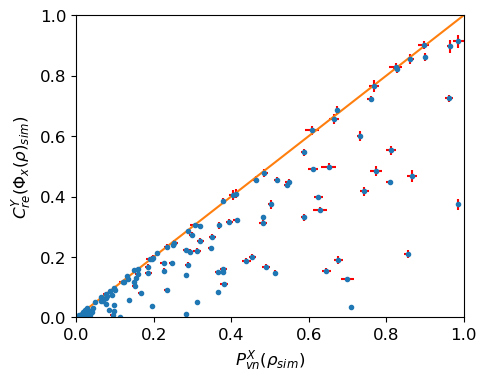

In [247]:
import matplotlib; matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (5,4), dpi = 100)
plt.errorbar(PvaS, CvaS, yerr = sdCS, xerr = sdPS, fmt = '.', ecolor = 'red'); 
plt.xlim(0,1); plt.ylim(0,1); 
plt.plot([0,1],[0,1]); plt.ylabel(r'$C^{Y}_{re}(\Phi_{x}(\rho)_{sim})$'); 
plt.xlabel(r'$P^{X}_{vn}(\rho_{sim})$'); 
plt.savefig(path_+'PxCsim.pdf', format = 'pdf', dpi = 200); plt.show()

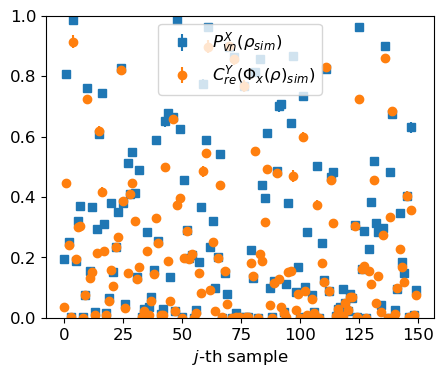

In [248]:
import matplotlib; matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (5,4), dpi = 100)
plt.errorbar(jv, PvaS, yerr = sdPS, fmt='s', label = r'$P^{X}_{vn}(\rho_{sim})$'); 
plt.errorbar(jv, CvaS, yerr = sdCS, fmt='o', label = r'$C^{Y}_{re}(\Phi_{x}(\rho)_{sim})$'); 
plt.ylim(0, 1)
plt.xlabel(r'$j$-th sample'); plt.legend(loc = 'upper center')
plt.savefig(path_+'PCsim.pdf', format = 'pdf', dpi = 200); plt.show()

## Experiment

In [213]:
# loading the angles from files
file = open(path_+'thvS', "rb"); thvS = np.load(file); file.close()
file = open(path_+'phvS', "rb"); phvS = np.load(file); file.close()
file = open(path_+'thvX', "rb"); thvX = np.load(file); file.close()
file = open(path_+'phvX', "rb"); phvX = np.load(file); file.close()
file = open(path_+'thvY', "rb"); thvY = np.load(file); file.close()
file = open(path_+'phvY', "rb"); phvY = np.load(file); file.close()
#print(phvX)

In [244]:
device = provider.get_backend('ibmq_belem')
lb = 0
rd = 5 # No. of the round of measurements being made
path = path_ + 'round' + str(rd) + '/'
for j in range(0, N):
    print('j = ', j)
    qr = QuantumRegister(2); qc = qiskit.QuantumCircuit(qr)
    # State preparation
    qc.u(thvS[j], phvS[j], lb, qr[0])
    qst_qc1 = state_tomography_circuits(qc, [qr[0]])
    job1E = qiskit.execute(qst_qc1, backend = device, shots = nshots) # executes the qst
    print(job1E.job_id()); job_monitor(job1E)
    qstf_qc1E = StateTomographyFitter(job1E.result(), qst_qc1) # fits the data to extract rho
    rho0_prepE = qstf_qc1E.fit(method = 'lstsq')
    file = open(path+str(j)+'prep'+'dev', "wb"); np.save(file, rho0_prepE); file.close
    # Non-revealing measurement
    qc.u(thvX[j], math.pi-lb, -math.pi-phvX[j], qr[0]); # Uˆdagger
    qc.cx(qr[0], qr[1]); # CNOT
    qc.u(thvX[j], phvX[j], lb, qr[0]); # the last U
    qst_qc2 = state_tomography_circuits(qc, [qr[0]]) # defines the qcircuit to make qst
    job2E = qiskit.execute(qst_qc2, backend = device, shots = nshots) # executes the qst
    print(job2E.job_id()); job_monitor(job2E)
    qstf_qc2E = StateTomographyFitter(job2E.result(), qst_qc2) # fits the data to extract rho
    rho0_measE = qstf_qc2E.fit(method='lstsq') 
    file = open(path+str(j)+'meas'+'dev', "wb"); np.save(file, rho0_measE); file.close

j =  0
60f6c17f225294029520056e
Job Status: job has successfully run
60f6c20814e487754c66c734
Job Status: job has successfully run
j =  1
60f6c2284f43475fde10593b
Job Status: job has successfully run
60f6c2444e49a88015868e50
Job Status: job has successfully run
j =  2
60f6c29a18e6ec358ea2a307
Job Status: job has successfully run
60f6c2d70391bd2e3b0999f8
Job Status: job has successfully run
j =  3
60f6c32fdcba7097702920b5
Job Status: job has successfully run
60f6c3714e49a801bc868e55
Job Status: job has successfully run
j =  4
60f6c39f18e6ec22d9a2a30e
Job Status: job has successfully run
60f6c3bd18e6ec0c7ba2a311
Job Status: job has successfully run
j =  5
60f6c4034ee391dc9a90161c
Job Status: job has successfully run
60f6c4214ee391589d90161d
Job Status: job has successfully run
j =  6
60f6c47d4f434724e9105944
Job Status: job has successfully run
60f6c4d218e6ec0773a2a318
Job Status: job has successfully run
j =  7
60f6c53b14e487312466c749
Job Status: job has successfully run
60f6c5750391bd

KeyboardInterrupt: 

In [224]:
nrounds = 4
for rd in range(1, nrounds+1):
    path = path_ + 'round' + str(rd) + '/'
    PvE = np.zeros(N); CvE = np.zeros(N)
    for j in range(0, N):
        file = open(path+str(j)+'prep'+'dev', "rb"); rho0_prepE = np.load(file)
        PvE[j] = predictability_vn(rho0_prepE, thvX[j], phvX[j]) # P with reference to X
        file = open(path+str(j)+'meas'+'dev', "rb"); rho0_measE = np.load(file)
        CvE[j] = coherence_re(rho0_measE, thvY[j], phvY[j]) # C with reference to Y
    file = open(path+'PvE', "wb"); np.save(file, PvE); file.close()
    file = open(path+'CvE', "wb"); np.save(file, CvE); file.close()

In [240]:
PvaE = np.zeros(N); CvaE = np.zeros(N)
Pv2aE = np.zeros(N); Cv2aE = np.zeros(N); sdPE = np.zeros(N); sdCE = np.zeros(N)
for rd in range(1, nrounds+1):
    path = path_ + 'round' + str(rd) + '/'
    PvE = np.zeros(N); CvE = np.zeros(N)
    file = open(path+'PvE', "rb"); PvE = np.load(file); file.close()
    file = open(path+'CvE', "rb"); CvE = np.load(file); file.close()
    PvaE += PvE; Pv2aE += PvE*PvE; CvaE += CvE; Cv2aE += CvE*CvE
PvaE = PvaE/nrounds; CvaE = CvaE/nrounds; Pv2aE = Pv2aE/nrounds; Cv2aE = Cv2aE/nrounds
sdPE = np.sqrt(Pv2aE-PvaE**2); sdCE = np.sqrt(Cv2aE-CvaE**2)
#print(sdCS)

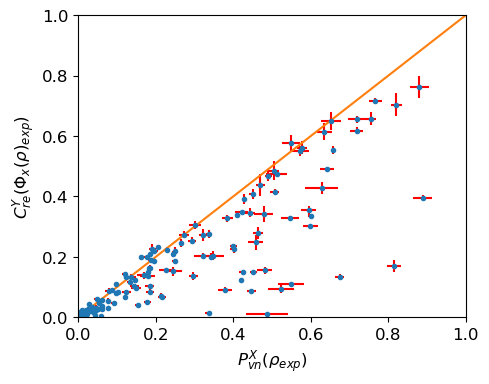

In [249]:
import matplotlib; matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (5,4), dpi = 100)
plt.errorbar(PvaE, CvaE, yerr = sdCE, xerr = sdPE, fmt = '.', ecolor = 'red'); 
plt.xlim(0,1); plt.ylim(0,1); 
plt.plot([0,1],[0,1]); plt.ylabel(r'$C^{Y}_{re}(\Phi_{x}(\rho)_{exp})$'); 
plt.xlabel(r'$P^{X}_{vn}(\rho_{exp})$')
plt.savefig(path_+'PxCexp.pdf', format = 'pdf', dpi = 200); plt.show()

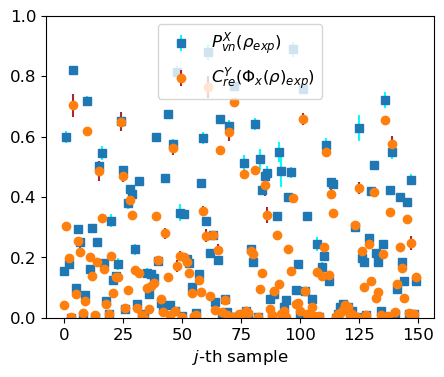

In [253]:
import matplotlib; matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (5,4), dpi = 100)
plt.errorbar(jv, PvaE, yerr = sdPE, fmt='s', label = r'$P^{X}_{vn}(\rho_{exp})$', ecolor = 'cyan'); 
plt.errorbar(jv, CvaE, yerr = sdCE, fmt='o', label = r'$C^{Y}_{re}(\Phi_{x}(\rho)_{exp})$', ecolor = 'brown'); 
plt.ylim(0, 1)
plt.xlabel(r'$j$-th sample'); plt.legend(loc = 'upper center')
plt.savefig(path_+'PCexp.pdf', format = 'pdf', dpi = 200); plt.show()

### Analysis of the cases $C>P$

In [76]:
for j in range(0, N):
    if CvE[j] > PvE[j]:
        print('j = ',j, ', C = ', CvE[j], ', P = ', PvE[j], ', C-P = ', CvE[j]-PvE[j])

j =  15 , C =  0.018929132601973046 , P =  0.015720365975055106 , C-P =  0.0032087666269179395
j =  16 , C =  0.10848241505791821 , P =  0.07061543650511304 , C-P =  0.03786697855280517
j =  17 , C =  0.13895294649745416 , P =  0.10978244530631687 , C-P =  0.029170501191137288
j =  19 , C =  0.04414708440501109 , P =  0.035778124753703566 , C-P =  0.008368959651307524
j =  30 , C =  0.009702102171679484 , P =  0.008077061678806619 , C-P =  0.0016250404928728653
j =  31 , C =  0.5876894038945147 , P =  0.5769795613067427 , C-P =  0.010709842587772078
j =  32 , C =  0.006007759616291446 , P =  0.0023192493407114823 , C-P =  0.003688510275579964
j =  33 , C =  0.058286050955012145 , P =  0.050389782170123576 , C-P =  0.007896268784888569
j =  39 , C =  0.015045818695671773 , P =  0.009450472467423365 , C-P =  0.005595346228248407
j =  43 , C =  0.3583864154999057 , P =  0.3543687554561863 , C-P =  0.0040176600437193954
j =  44 , C =  0.003515375707330216 , P =  0.00029114347591474576 , C-

In [68]:
Cr = []; Pr = [] # for the repetitions
j = 107
device = provider.get_backend('ibmq_belem')
M = 10
for k in range(0, M):
    print('k = ', k)
    qr = QuantumRegister(2); qc = qiskit.QuantumCircuit(qr)
    # State preparation
    qc.u(thvS[j], phvS[j], lb, qr[0])
    qst_qc1 = state_tomography_circuits(qc, [qr[0]])
    job1E = qiskit.execute(qst_qc1, backend = device, shots = nshots) # executes the qst
    print(job1E.job_id()); job_monitor(job1E)
    qstf_qc1E = StateTomographyFitter(job1E.result(), qst_qc1) # fits the data to extract rho
    rho0_prepE = qstf_qc1E.fit(method = 'lstsq')
    Pr.append(predictability_vn(rho0_prepE, thvX[j], phvX[j])) # P with reference to X
    # Non-revealing measurement
    qc.u(thvX[j], math.pi-lb, -math.pi-phvX[j], qr[0]); # Uˆdagger
    qc.cx(qr[0], qr[1]); # CNOT
    qc.u(thvX[j], phvX[j], lb, qr[0]); # the last U
    qst_qc2 = state_tomography_circuits(qc, [qr[0]]) # defines the qcircuit to make qst
    job2E = qiskit.execute(qst_qc2, backend = device, shots = nshots) # executes the qst
    print(job2E.job_id()); job_monitor(job2E)
    qstf_qc2E = StateTomographyFitter(job2E.result(), qst_qc2) # fits the data to extract rho
    rho0_measE = qstf_qc2E.fit(method='lstsq') 
    Cr.append(coherence_re(rho0_measE, thvY[j], phvY[j])) # C with reference to Y

k =  0
60f4dfcac50bbcaaecd2395d
Job Status: job has successfully run
60f4dfe7c50bbcc406d2395e
Job Status: job has successfully run
k =  1
60f4e00576776b6f6bad7934
Job Status: job has successfully run
60f4e01876776b13b8ad7936
Job Status: job has successfully run
k =  2
60f4e0476660997b6e87da7b
Job Status: job has successfully run
60f4e073c50bbced4bd23968
Job Status: job has successfully run
k =  3
60f4e09ec50bbc81ffd2396c
Job Status: job has successfully run
60f4e0d6811f3d685f07f013
Job Status: job has successfully run
k =  4
60f4e0fc24ebb7108e1feec6
Job Status: job has successfully run
60f4e11451939c76c6a38046
Job Status: job has successfully run
k =  5
60f4e13f5a912a8e716057c4
Job Status: job has successfully run
60f4e17b811f3d78f507f019
Job Status: job has successfully run
k =  6
60f4e1a8811f3d846d07f01e
Job Status: job has successfully run
60f4e1d3c50bbc7dc9d23979
Job Status: job has successfully run
k =  7
60f4e2015a912a8b796057d1
Job Status: job has successfully run
60f4e21776776b

In [73]:
Pm = 0; Cm = 0; P2m = 0; C2m = 0
for k in range(0, len(Pr)):
    Pm += Pr[k]; P2m += Pr[k]**2; Cm += Cr[k]; C2m += Cr[k]**2
Pm = Pm/M; P2m = P2m/M; Cm = Cm/M; C2m = C2m/M
sdP = math.sqrt(P2m-Pm**2); sdC = math.sqrt(C2m-Cm**2)
print('<P> = ', Pm, ', sdP = ', sdP, ', <C> = ', float(Cm), ', sdC = ',sdC)

<P> =  0.742909635377688 , sdP =  0.018516405374867567 , <C> =  0.7293467791686682 , sdC =  0.017040098369477646


So, on the average $P>C$!

# 2 qubits

In [291]:
import qiskit
qiskit.IBMQ.load_account()
provider = qiskit.IBMQ.get_provider(hub = 'ibm-q-research-2', group = 'federal-uni-sant-1', project = 'main')
from qiskit.tools.monitor import job_monitor
nshots = 8192
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter

ibmqfactory.load_account:WARNING:2021-07-27 10:23:43,263: Credentials are already in use. The existing account in the session will be replaced.


In [148]:
qr = qiskit.QuantumRegister(5)
qc = qiskit.QuantumCircuit([qr[1],qr[2],qr[3],qr[4]])
# state preparation
th,ph,lb = math.pi, 0, 0; qc.u(th,ph,lb,qr[1]); qc.u(th,ph,lb,qr[3]); qc.cx(qr[1],qr[3]);
qc.barrier()
# non-selective measurement
qc.cx(qr[1],qr[2]); qc.cx(qr[3],qr[4]);

In [149]:
qc.draw()

┌──────────┐      ░      
_0: ┤ U(π,0,0) ├──■───░───■──
    └──────────┘  │   ░ ┌─┴─┐
_1: ──────────────┼───░─┤ X ├
    ┌──────────┐┌─┴─┐ ░ └───┘
_2: ┤ U(π,0,0) ├┤ X ├─░───■──
    └──────────┘└───┘ ░ ┌─┴─┐
_3: ──────────────────░─┤ X ├
                      ░ └───┘

## Functions

In [292]:
def predict_vn(rho):
    d = rho.shape[0]; pv = np.zeros(d)#; print(rho)
    for j in range(0,d):
        pv[j] = rho[j,j].real
    return math.log(d,2) - shannon_num(pv)

In [293]:
def coh_re(rho):
    d = rho.shape[0]; pv = np.zeros(d)#; print(rho)
    for j in range(0,d):
        pv[j] = rho[j,j].real
    return shannon_num(pv) - von_neumann_num(rho) # for numerics

In [294]:
def basis_rep(O, B):
    # input O represented in the standard basis
    # input B, the new basis vectors as the columns of B
    d = O.shape[0]; OB = np.zeros((d,d), dtype='complex')
    for j in range(0, d):
        for k in range(0, d):
            for l in range(0, d):
                for m in range(0, d):
                    OB[j,k] += B[m,j].conjugate()*O[m,l]*B[l,k]
    return OB

In the following, we use the MUBs from (New Journal of Physics 13 (2011) 053047)
$$B_{2} = \frac{1}{2}\begin{bmatrix} 1&1&1&1 \\ i&-i&i&-i \\ 1&1&-1&-1 \\ -i&i&i&-i \end{bmatrix}$$

In [295]:
B2 = (1/2)*np.array([[1,1,1,1],[1j,-1j,1j,-1j],[1,1,-1,-1],[-1j,1j,1j,-1j]]);# B

## Simulation

In [258]:
import platform
if platform.system() == 'Linux':
    path_ = '/home/jonasmaziero/Dropbox/Research/predictability/psi_2qb/'
else:
    path_ = '/Users/jonasmaziero/Dropbox/Research/predictability/psi_2qb/'

In [259]:
device = provider.get_backend('ibmq_belem')
simulator = qiskit.Aer.get_backend('qasm_simulator')

In [298]:
thm = math.pi/2; dth = thm/16; thv = np.arange(0, thm, dth)
for j in range(0, len(thv)):
    qr = qiskit.QuantumRegister(5); qc = qiskit.QuantumCircuit(qr);
    # state preparation
    qc.u(thv[j],0,0,qr[1]); qc.u(thv[j],0,0,qr[3]); 
    qst_qc = state_tomography_circuits(qc, [qr[1],qr[3]]); # defines the qcircuit to make qst
    job = qiskit.execute(qst_qc, backend = simulator, shots = nshots) # executes the qst
    qstf_qc = StateTomographyFitter(job.result(), qst_qc) # fits the data to extract rho
    rho_prep = qstf_qc.fit(method = 'lstsq');
    file = open(path_+'round1/'+str(j)+'prep'+'sim', "wb"); np.save(file, rho_prep); file.close
    # non-selective measurement
    qc.cx(qr[1],qr[2]); qc.cx(qr[3],qr[4]);
    qst_qc = state_tomography_circuits(qc, [qr[1],qr[3]]); # defines the qcircuit to make qst
    job = qiskit.execute(qst_qc, backend = simulator, shots = nshots) # executes the qst
    qstf_qc = StateTomographyFitter(job.result(), qst_qc) # fits the data to extract rho
    rho_prep = qstf_qc.fit(method = 'lstsq');
    file = open(path_+'round1/'+str(j)+'meas'+'sim', "wb"); np.save(file, rho_prep); file.close

In [299]:
PvS = np.zeros(len(thv)); CvS = np.zeros(len(thv))
for j in range(0, len(thv)):
    file = open(path_+'round1/'+str(j)+'prep'+'sim', "rb"); rho_prep = np.load(file); file.close()
    PvS[j] = predict_vn(rho_prep) # P with reference to B4
    file = open(path_+'round1/'+str(j)+'meas'+'sim', "rb"); rho_meas = np.load(file); file.close()
    rho_B2 = basis_rep(rho_meas, B2)
    CvS[j] = coh_re(rho_B2) # C with reference to B2

## Error mitigation

In [275]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)
calibration_circuits, state_labels = complete_meas_cal(qr = qc.qregs[0]) # defines the calibration circuits
job_cal = qiskit.execute(calibration_circuits, backend = device, shots = nshots, optimization_level = 0) # run CC
print(job_cal.job_id()); job_monitor(job_cal)
results_cal = job_cal.result(); meas_fitter = CompleteMeasFitter(results_cal, state_labels)
meas_filter = meas_fitter.filter
#mitigated_result = meas_filter.apply(device_result)

610001deb581e8556321f348
Job Status: job has successfully run


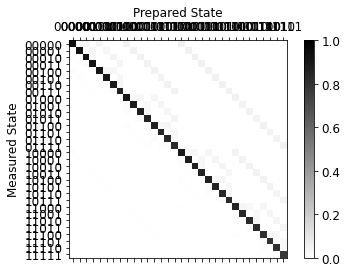

In [276]:
meas_fitter.plot_calibration()

## Experiment

In [305]:
nrounds = 4
path = path_ + 'round' + str(nrounds) + '/'

In [306]:
thm = math.pi/2; dth = thm/16; thv = np.arange(0, thm, dth)
for j in range(0, len(thv)):
    print('j = ', j)
    qr = qiskit.QuantumRegister(5); qc = qiskit.QuantumCircuit(qr);
    # state preparation
    qc.u(thv[j],0,0,qr[1]); qc.u(thv[j],0,0,qr[3]); 
    qst_qc = state_tomography_circuits(qc, [qr[1],qr[3]]); # defines the qcircuit to make qst
    job = qiskit.execute(qst_qc, backend = device, shots = nshots) # executes the qst
    print(job.job_id()); job_monitor(job)
    #result_mitigated = meas_filter.apply(job.result()) # apply error mitigation # not working!
    qstf_qc = StateTomographyFitter(job.result(), qst_qc) # fits the data to extract rho
    rho_prep = qstf_qc.fit(method = 'lstsq');
    file = open(path+str(j)+'prep'+'exp', "wb"); np.save(file, rho_prep); file.close
    # non-selective measurement
    qc.cx(qr[1],qr[2]); qc.cx(qr[3],qr[4]);
    qst_qc = state_tomography_circuits(qc, [qr[1],qr[3]]); # defines the qcircuit to make qst
    job = qiskit.execute(qst_qc, backend = device, shots = nshots) # executes the qst
    print(job.job_id()); job_monitor(job)
    #result_mitigated = meas_filter.apply(job.result()) # apply error mitigation
    qstf_qc = StateTomographyFitter(job.result(), qst_qc) # fits the data to extract rho
    rho_meas = qstf_qc.fit(method = 'lstsq');
    file = open(path+str(j)+'meas'+'exp', "wb"); np.save(file, rho_meas); file.close

j =  0
610014bb2da0a49cbd48933e
Job Status: job has successfully run
610014dd35e57b8a68141473
Job Status: job has successfully run
j =  1
610014fed6b9ca1b21ffc5bb
Job Status: job has successfully run
6100151e3a57f464aecd0509
Job Status: job has successfully run
j =  2
6100154efcfd9670cdf4be80
Job Status: job has successfully run
610015700a152e00d70a82af
Job Status: job has successfully run
j =  3
6100159235e57bb8b3141478
Job Status: job has successfully run
610015b33a57f458c1cd050c
Job Status: job has successfully run
j =  4
610015d535e57ba32e14147a
Job Status: job has successfully run
610015f73a57f4bd63cd050f
Job Status: job has successfully run
j =  5
6100161b35e57b0d0a14147b
Job Status: job has successfully run
610016502da0a49178489342
Job Status: job has successfully run
j =  6
6100167a35e57b704714147c
Job Status: job has successfully run
6100169d2da0a4cb6c489344
Job Status: job has successfully run
j =  7
610016c0bd06b8200a22dc19
Job Status: job has successfully run
610016e06048ae

In [315]:
PvEavg = np.zeros(len(thv)); CvEavg = np.zeros(len(thv)); 
PvE2avg = np.zeros(len(thv)); CvE2avg = np.zeros(len(thv))
for rd in range(1, nrounds+1):
    path = path_ + 'round' + str(rd) + '/'; #print(path)
    PvE = np.zeros(len(thv)); CvE = np.zeros(len(thv))
    for j in range(0, len(thv)):
        file = open(path+str(j)+'prep'+'exp', "rb"); rho_prep = np.load(file); file.close()
        PvE[j] = predict_vn(rho_prep) # P with reference to B4
        file = open(path+str(j)+'meas'+'exp', "rb"); rho_meas = np.load(file); file.close()
        rho_B2 = basis_rep(rho_meas, B2)
        CvE[j] = coh_re(rho_B2) # C with reference to B2
    PvEavg += PvE; PvE2avg += PvE*PvE; CvEavg += CvE; CvE2avg += CvE*CvE 
PvEavg = PvEavg/nrounds; CvEavg = CvEavg/nrounds; PvE2avg = PvE2avg/nrounds; CvE2avg = CvE2avg/nrounds
sdPE = np.sqrt(PvE2avg-PvEavg**2); sdCE = np.sqrt(CvE2avg-CvEavg**2)

In [309]:
sdPE

array([0.01626037, 0.00796884, 0.00418375, 0.01042076, 0.00909056,
       0.01238888, 0.01176136, 0.01058981, 0.01014499, 0.02198798,
       0.01806743, 0.00725295, 0.00893572, 0.00573972, 0.0079545 ,
       0.00314031])

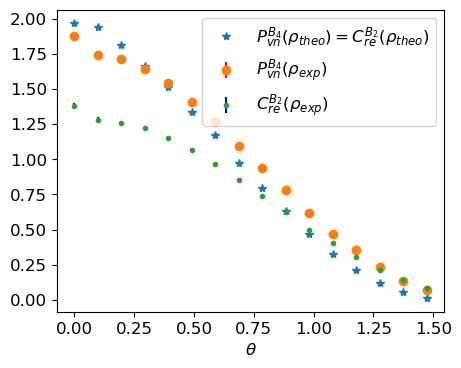

In [313]:
import matplotlib; matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (5,4), dpi = 100)
plt.plot(thv, PvS, '*', label = r'$P_{vn}^{B_{4}}(\rho_{theo})=C_{re}^{B_{2}}(\rho_{theo})$'); 
#plt.plot(thv, CvS, '*', label = r'$C^{B_{2}}(\rho_{sim})$');
plt.errorbar(thv, PvEavg, yerr = sdPE, fmt = 'o', ecolor = 'red', label = r'$P_{vn}^{B_{4}}(\rho_{exp})$'); 
plt.errorbar(thv, CvEavg, yerr = sdCE, fmt = '.', ecolor = 'blue', label = r'$C_{re}^{B_{2}}(\rho_{exp})$')
plt.xlabel(r'$\theta$'); plt.legend(); 
plt.savefig(path_+'PCexp2qb.pdf', format = 'pdf', dpi = 200);
plt.show()